# <center> Guia 2 </center>
Alumno: Brusco Agustín

Docentes: Rodriguez Imazio Paola, Amette Estrada Julian

## Imports Generales
Ejecutar la siguiente celda para poder correr el código del Notebook.

In [1]:
import sys
import os
# Colab Set-Up
if ("google.colab" in sys.modules) and (os.getcwd() == '/content'):
    print(
        "Ejecutando en Google Colab\n"
        "Para correr el notebook se necesita clonar un repositorio con funciones "
        "auxiliares e instalar librerías."
    )
    if input(
        "¿Desea clonar el repositorio e instalar los paquetes necesarios?"
        "[y/n]:"
    ).lower() == "y":
        os.system("git clone https://github.com/agustinbrusco/Sistemas_Complejos.git")
        os.chdir("Sistemas_Complejos/guias/")
        %pip install tqdm
        %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

# Imports Generales
from typing import Callable
from tqdm.notebook import tqdm
import numpy as np
from numpy.typing import ArrayLike
from scipy.integrate import odeint, ode
import torch
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import matplotlib.pyplot as plt
# Matplotlib settings
%config InlineBackend.figure_format = "retina"  # For high dpi figures in notebook
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.dpi"] = 120
plt.rcParams["legend.fontsize"] = "medium"
plt.rcParams["axes.labelsize"] = "large"

from utils import plot_3d_evolution, plot_colorline

## **La ecuación de Burgers**





La ecuación de Burgers

\begin{equation}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \frac{\partial^2 u}{\partial x^2} = 0.                          
\end{equation}

Forma parte de un grupo de ecuaciones no-lineales en derivadas parciales
"universales" que aparecen en muchos contextos.

En rigor, fue introducida en 1915 por Bateman [1], quien propuso una
solución de estado estacionario para el problema. Más
tarde, en 1948, el físico holandés J. M. Burgers, propuso
esta ecuación como modelo matemático de turbulencia [2,
3] y debido a su amplia contribución, la ecuación lleva su
nombre. A pesar de ser una versión simplificada de la ecuación de Navier Stokes,
se caracteriza por tener un término
dependiente del tiempo, un término de advección y un
término de difusión, con lo cual guarda la no-linealidad y las principales características de esta.
Se utiliza muchas veces como modelo de juguete para testear implementaciones numéricas de flujos turbulentos.

En su forma mas general (con el término de difusión) la ecuación es del tipo parabólica, mientras que en el caso ideal (invisido) es una ecuación hiperbólica. En ambos casos, resulta útil buscar leyes de conservación, de camino a las soluciones.

[1] Bateman, H., Some recent researches on the motion of
fluids, Monthy Wather Rev. 43, 163-170 (1915).

[2] Burgers, J. M., A mathematical model illustrating the
theory or turbulence, Advances in Applied Mechanics 1,
171-199 (1948).

[3] Burgers, J. M., Mathematical examples illustrating
relations occuring in the theory of turbulent fluid motion,
Trans. Roy. Neth. Acad. Sci. Amsterdam 1. 17, 1-53
(1939).

## **Ejercicio 1**


$\bf a)$ Mostrar que esta ecuación conserva el momento incluso para $\nu \neq 0$.

$\bf b)$ A partir de la ecuación de balance mostrá la conservación local de la energía. Bajo que condiciones se conserva la energía global?

$\bf c)$ Explica la aparición de "frentes" a partir de la ecuación para la evolución de los gradientes. (*Ayuda: esto puede hacerce derivando la ecuación de Burgers con respecto de x*)

$\bf d)$ Mediante la sustitución: $u(x,t) = -2\nu \partial_x\phi/\phi$ (transformación de Hopf) es posible hallar la solución exacta de (1). Escribí la ecuación. Que tipo de soluciones tiene? Describí la aparición de frentes en términos de estas soluciones.



---
**Resolución aqui**


---



### a)
Para observar la conservación del momento en la Ecuación de Burgers podemos reescribirla como:
$$\frac{\partial u}{\partial t} + \frac{\partial}{\partial x}\left(\frac{u^2}{2} - \nu \frac{\partial u}{\partial x}\right) = 0.$$
Luego, si integramos respecto de $x$ en el intervalo $[a,b]$ obtenemos:
$$\int\limits_a^b \frac{\partial u}{\partial t} \,\mathrm{d}x + \int\limits_a^b \frac{\partial}{\partial x}\left(\frac{u^2}{2} - \nu \frac{\partial u}{\partial x}\right) \,\mathrm{d}x = 0,$$
$$\Rightarrow \frac{\partial}{\partial t}\int\limits_a^b u \,\mathrm{d}x + \left[\frac{u^2}{2} - \nu \frac{\partial u}{\partial x}\right]_a^b = 0.$$
Tomando ahora que $u(a,t) = u(b,t)$ (condiciones de borde comptabiles con un flujo periódico o con extremos cerrados) se tiene que el segundo término se anula, obteniendo:
$$\frac{\partial}{\partial t}\int\limits_a^b u \,\mathrm{d}x = 0.$$
Luego puede sumarse el término $u \frac{\partial}{\partial x} \int_a^b u \, \mathrm{d}x$ a la ecuación sin alterarla (ya que $\int_a^b u \, \mathrm{d}x$ no depende de $x$), obteniendo la derivada total de la integral:
$$\frac{\mathrm{d}}{\mathrm{d}t}\int\limits_a^b u \,\mathrm{d}x = 0,$$
siendo la integral en el lado izquierdo la cantidad de momento en el intervalo $[a,b]$. De esta manera, tenemos que el momento se conserva globalmente (en el recinto) en el tiempo.

### b)
Para mostrar la conservación de la energía multiplico la ecuación de Burgers por $u$ y reescribo la ecuación como:
$$
\begin{align*}
 u\frac{\partial u}{\partial t} + u^2\frac{\partial}{\partial x}u & = & \nu u \frac{\partial^2 u}{\partial x^2} \\
 \iff \frac{\partial}{\partial t}\!\left(\frac{u^2}{2}\right) + u\frac{\partial}{\partial x}\!\left(\frac{u^2}{2}\right) & = & \nu u \frac{\partial^2 u}{\partial x^2} \\
 \iff \frac{\mathrm{d}}{\mathrm{d}t}\!\left(\frac{u^2}{2}\right) & = & \nu u \frac{\partial^2 u}{\partial x^2} \\
\end{align*}.$$
Observando que $\frac{u^2}{2}$ es la energía, se tiene que hay una perdida de energía local debido a la difusión, por lo que solo se conservará en el caso de que no haya difusión ($\nu = 0$). Ahora, para estudiar la conservación global de la energía, queremos ver si la integral en el recinto (entre $a$ y $b$) de $\frac{u^2}{2}$ varía en el tiempo. Para ello integramos la segunda ecuación de arriba en el intervalo $[a, b]$:
$$\int\limits_a^b \frac{\partial}{\partial t} \left(\frac{u^2}{2}\right) \!\mathrm{d}x + \int\limits_a^b u\frac{\partial}{\partial x} \left(\frac{u^2}{2}\right) \!\mathrm{d}x = \int\limits_a^b \nu u \frac{\partial^2 u}{\partial x^2} \!\mathrm{d}x,$$
$$\iff \frac{\partial}{\partial t} \int\limits_a^b \left(\frac{u^2}{2}\right) \!\mathrm{d}x + \int\limits_a^b u^2\frac{\partial u}{\partial x} \!\mathrm{d}x = \int\limits_a^b \nu u \frac{\partial^2 u}{\partial x^2} \!\mathrm{d}x,$$
$$\iff \frac{\partial}{\partial t} \int\limits_a^b \left(\frac{u^2}{2}\right) \!\mathrm{d}x + \int\limits_a^b \frac{\partial}{\partial x} \left(\frac{u^3}{3}\right) \!\mathrm{d}x = \int\limits_a^b \nu u \frac{\partial^2 u}{\partial x^2} \!\mathrm{d}x,$$
$$\iff \frac{\partial}{\partial t} \int\limits_a^b \left(\frac{u^2}{2}\right) \!\mathrm{d}x + \left[\frac{u^3}{3}\right]_a^b = \int\limits_a^b \nu u \frac{\partial^2 u}{\partial x^2} \!\mathrm{d}x,$$

Nuevamente en condiciones de borde adecuadas el término $u^3$ se anula. Y sumando la integral $\frac{\partial}{\partial x}\int_a^b \frac{u^2}{2}\,\mathrm{d}x = 0$ a la izquierda para hacer aparecer la derivada total de la integral, se obtiene:
$$\frac{\mathrm{d}}{\mathrm{d}t} \int\limits_a^b \left(\frac{u^2}{2}\right) \!\mathrm{d}x = \nu \int\limits_a^b u \frac{\partial^2 u}{\partial x^2} \!\mathrm{d}x,$$
de lo que se deduce que la energía se conserva globalmente en el recinto si $\nu = 0$.

### c)


## **Ejercicio 2: Burgers con diferencias finitas**

$\bf a)$ Derivá la expresión para resolver numéricamente la ecuación de Burgers mediante un método de diferencias finitas con un esquema de Euler adelantado como integrador temporal.

$\bf b)$ Implementá numericamente esta expresión para resolver la ecuación en un dominio $[0,2\pi)$ considerando los siguientes parámetros: $\nu = 1\times 10^{-2}$ con $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$. Utilizá distintas condiciones iniciales del tipo:

$$ u_0 = sen(ax)$$
$$ u_0 = cos(x) + cos(bx) + sen(ax) $$

con a, b constantes arbitrarias.

$\bf c)$ De qué depende la aparición de los frentes? Siempre se ven? Graficá la solución obtenida ($u(x,t)$) para distintos tiempos sucesivos.

$\bf d)$ Qué sucede si comienzo con una velocidad inicial nula?




---

**Resolucion aqui**

---



### a)
Para obtener la expresión que permite resolver numéricamente la ecuación de Burgers parto de la PDE:
$$\frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2}$$
y la discretizo en el tiempo con un esquema de Euler adelantado:
$$\frac{u^{n+1}_i - u^n_i}{\Delta t} = - u^n_i \frac{\partial u^n_i}{\partial x} + \nu \frac{\partial^2 u^n_i}{\partial x^2}.$$
$$\Rightarrow u^{n+1}_i = u^n_i + \Delta t \left(- u^n_i \frac{\partial u^n_i}{\partial x} + \nu \frac{\partial^2 u^n_i}{\partial x^2}\right).$$
Luego, discretizo las derivadas espaciales con diferencias finitas centradas:
$$\frac{\partial u^n_i}{\partial x} = \frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x}$$
$$\frac{\partial^2 u^n_i}{\partial x^2} = \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2}.$$
Así, la ecuación de Burgers discretizada queda:
$$u^{n+1}_i = u^n_i + \Delta t \left(-u^n_i \frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x} + \nu \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2}\right).$$

Esto puede reescribirse matricialmente definiendo $\vec{u}^n = (u^n_0, u^n_1, \dots, u^n_{N_x-1})$ y $\vec{u}^{n+1} = (u^{n+1}_0, u^{n+1}_1, \dots, u^{n+1}_{N_x-1})$ como vectores columna, y las matrices $\mathbb{D}_1$ y $\mathbb{D}_2$ como las matrices tridiagonales:
$$\mathbb{D}_1 = \frac{1}{2\Delta x}\begin{pmatrix}
0 & 1 & 0 & \dots & 0 & 0 & -1 \\
-1 & 0 & 1 & \dots & 0 & 0 & 0 \\
0 & -1 & 0 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 0 & 1 & 0 \\
0 & 0 & 0 & \dots & -1 & 0 & 1 \\
1 & 0 & 0 & \dots & 0 & -1 & 0 \\
\end{pmatrix}$$
y
$$\mathbb{D}_2 = \frac{1}{\Delta x^2}\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 & 1 \\
1 & -2 & 1 & \dots & 0 & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -2 & 1 & 0 \\
0 & 0 & 0 & \dots & 1 & -2 & 1 \\
1 & 0 & 0 & \dots & 0 & 1 & -2 \\
\end{pmatrix}$$

De esta manera, la ecuación de Burgers discretizada puede escribirse como:
$$\vec{u}^{n+1} = \vec{u}^n + \Delta t \left(-\mathbb{D}_1 \vec{u}^n \mathbb{U}^n + \nu \mathbb{D}_2 \vec{u}^n\right),$$
dónde $\mathbb{U}^n$ es la matriz diagonal tal que $\mathbb{U}^n_{ii} = u^n_i$.



### b)

In [59]:
#Defino lo que voy a necesitar
nx = 512
nt = 1000
L = 2 * np.pi
dx = L / (nx - 1)
nu = 1e-2
dt = 1e-3

x_vals = np.linspace(0, L, nx, endpoint=False)  # Coordenada espacial en [0, 2*pi)
t_vals = np.arange(nt) * dt

In [60]:
# Defino las matrices de diferencias finitas
D_1 = (np.eye(nx, k=1) - np.eye(nx, k=-1))
D_1[-1, 0], D_1[0, -1] = 1, -1  # contorno periódico
D_1 /= (2 * dx)
D_2 = (np.eye(nx, k=1) - 2 * np.eye(nx) + np.eye(nx, k=-1))
D_2[-1, 0], D_2[0, -1] = 1, 1  # contorno periódico
D_2 /= (dx**2)


In [61]:
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = np.sin(x_vals)  # alguna condicion inicial
# u[:, 0] = np.cos(x_vals) + np.cos(20*x_vals) + np.sin(x_vals)  # alguna condicion inicial
# u[:, 0] = np.exp(- (x_vals - L/2)**2 / 0.5**2)  # alguna condicion inicial

# Aplico el método de Euler para la integración temporal
for n in range(nt - 1):
    u[:, n+1] = u[:, n] + dt * (
        - (D_1 @ u[:, n]) @ np.diag(u[:, n])  # du/dx * u
        + nu * D_2 @ u[:, n]  # nu * d^2u/dx^2
    )

### c)


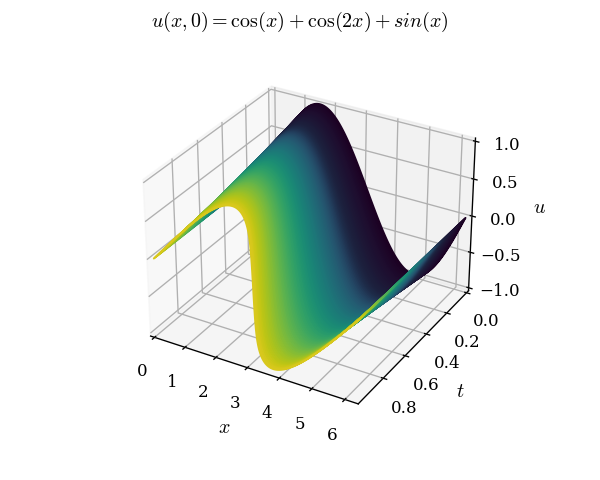

In [62]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Diferencias Finitas")
fig.suptitle(r"$u(x, 0) = \cos(x) + \cos(2x) + sin(x)$")
plt.show()

### d)

In [63]:
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = 0  # alguna condicion inicial


# Aplico el método de Euler para la integración temporal
for n in range(nt - 1):
    u[:, n+1] = u[:, n] + dt * (
        - (D_1 @ u[:, n]) @ np.diag(u[:, n])  # du/dx * u
        + nu * D_2 @ u[:, n]  # nu * d^2u/dx^2
    )

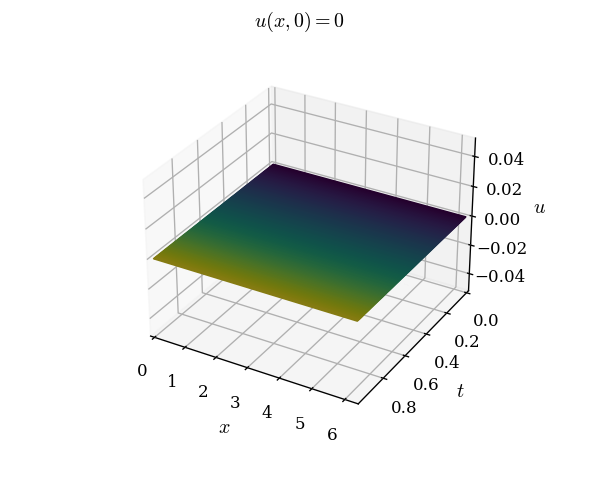

No such comm: 74fe71e8d127468aa720574fba6204da


In [64]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Diferencias Finitas")
fig.suptitle(r"$u(x, 0) = 0$")
plt.show()

In [65]:
# Cerramos forzozamente los plots interactivos de la sección
plt.close("all")

## **Ejercicio 3: Burgers con métodos pseudoespectrales**

Implementá un método de Fourier con condiciones de contorno periódicas en el dominio $x \in [0,2\pi)$ para resolver numericamente la ecuación de Burgers, considerando las mismas condiciones iniciales del ejercicio anterior y utilizando un método de Runge Kutta de orden dos como integrador temporal.

$\bf a)$ Integrá hasta $t_f = 4$ considerando los siguientes parámetros: $\nu = 0$, $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$, verificá cualitativamente la solución hallada y estudia la conservación de la energía. *Ayuda: podes calcular la energía (a menos de una constante) dado un arreglo* $u[t,x]$ como `E = np.mean(u**2, axis=1)`

$\bf b)$ Considerando los siguientes parámetros: $\nu = 1\times 10^{-2}$ con $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$, graficá la solución obtenida ($u(x,t)$) hasta que la amplitud inicial cae a la mitad. Describi
cualitativamente la dinámica.

$\bf c)$ Que sucede si se  aumenta la viscocidad a $\nu = 1\times 10^{-1}$? Y si se la disminuye a $\nu = 1\times 10^{-3}$?.



---

**Resolución aquí**


---






En este caso, el esquema de Runge Kutta de orden dos aplicado en el espacio de Fourier sería:
$$\hat{u}_{n+1} = \hat{u}_{n} + \mathrm{d}t \cdot \phi\left(t_n + \frac{\mathrm{d}t}{2}, \hat{u}_n  + \frac{\mathrm{d}t}{2}\phi\left(t_n, \hat{u}_n\right)\right)$$
Para obtener la expresión de $\phi$ aplico la transformada de Fourier a la ecuación de Burgers:
$$\frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2}$$
$$\Rightarrow \mathcal{F}\left[\frac{\partial u}{\partial t}\right] = - \mathcal{F}\left[u  (\mathcal{F^{-1}}[i k u])\right] - \nu k^2 \hat{u}$$
$$\phi(t_n, \hat{u}_n) = \frac{\partial}{\partial t}\mathcal{F}\left[u\right]= - \mathcal{F}\left[u  (\mathcal{F^{-1}}[i k u])\right] - \nu k^2 \hat{u}$$

In [143]:
def evol(u: ArrayLike, k: ArrayLike, nu: float, N: float, dt: float):
    """Evoluciona en el tiempo la PDE usando el método pseudoespectral y \
Runge-Kutta de segundo orden.
    """
    u_hat = np.fft.rfft(u)  # Transformamos al espacio de Fourier
    u_hat_inicial = u_hat  # Guardamos el estado inicial
    for ord in [2,1]:  # Bucle para el Runge-Kutta
        D = dt/ord
        u_ux_hat = compute_advection(u_hat, k, N)
        u_hat = u_hat_inicial + D*(-u_ux_hat - nu*(k**2)*u_hat)  # Integramos en el tiempo
        u_hat[int(N/3):] = 0  # Dealiasing (eliminemos modos espúreos!)
    u_nuevo = np.fft.irfft(u_hat)  # Vuelva del espacio de Fourier
    return u_nuevo

def compute_advection(u_hat,k,N):
    """Calcula u*ux usando el método pseudoespectral y devuelve el resultado \
en el espacio Fourier.
    """
    ux_hat = 1j*k*u_hat  # Derivamos
    u = np.fft.irfft(u_hat)
    ux = np.fft.irfft(ux_hat)
    u_ux_hat = np.fft.rfft(u * ux)
    return u_ux_hat

In [144]:
# Defino mis puntos en el espacio real y los modos para el espacio de Fourier
nx = 512
tf = 1
dt = 1e-3
L = 2 * np.pi

x_vals = np.linspace(0, L, nx, endpoint=True)  # Coordenada espacial en [0,2*pi]
t_vals = np.arange(0, tf + dt/2, dt)  # Tiempo
nt = t_vals.size
# Números de onda ordenados como en la FFT
k_vals = np.fft.rfftfreq(nx, d=(x_vals[1] - x_vals[0])) * 2 * np.pi

In [145]:
nu = 1e-2
u = np.empty([nx, nt])  # Array con la velocidad
# u[:, 0] = np.sin(2*np.pi*x_vals/L)  # CI: senoidal pura
u[:, 0] = np.cos(x_vals) + np.cos(20*x_vals) + np.sin(x_vals)  # CI: suma de armónicas
# u[:, 0] = np.exp(- (x_vals - L/2)**2 / 0.5**2)  # CI: gaussiana
# u[:, 0] = 0  # CI: constantemente cero

# Aplico el método de Euler para la integración temporal
for n in range(nt - 1):
    u[:, n+1] = evol(u[:, n], k_vals, nu, nx, dt)

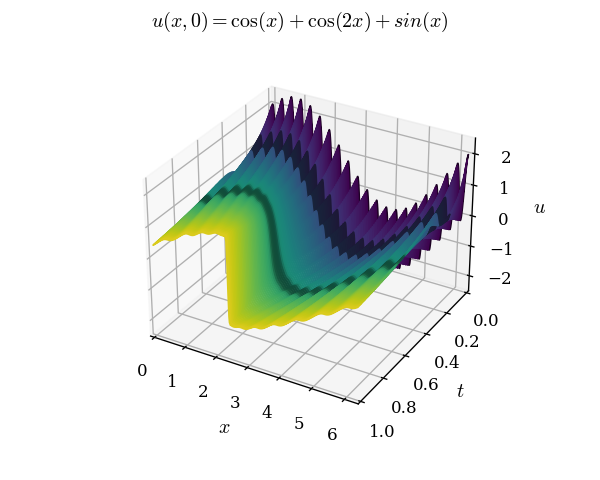

In [146]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = \cos(x) + \cos(2x) + sin(x)$")
plt.show()

### a)

In [70]:
# Defino mis puntos en el espacio real y los modos para el espacio de Fourier
nx = 512
tf = 4
dt = 1e-3
L = 2 * np.pi

x_vals = np.linspace(0, L, nx, endpoint=True)  # Coordenada espacial en [0,2*pi]
t_vals = np.arange(0, tf + dt/2, dt)  # Tiempo
nt = t_vals.size
# Números de onda ordenados como en la FFT
k_vals = np.fft.rfftfreq(nx, d=(x_vals[1] - x_vals[0])) * 2 * np.pi

In [71]:
nu = 0
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = np.sin(x_vals)  # CI: senoidal pura
# u[:, 0] = np.cos(x_vals) + np.cos(2*x_vals) + np.sin(x_vals)  # CI: suma de armónicas
# u[:, 0] = np.exp(- (x_vals - L/2)**2 / 0.5**2)  # CI: gaussiana
# u[:, 0] = 0  # CI: constantemente cero

# Aplico el método de Euler para la integración temporal
for n in range(nt - 1):
    u[:, n+1] = evol(u[:, n], k_vals, nu, nx, dt)

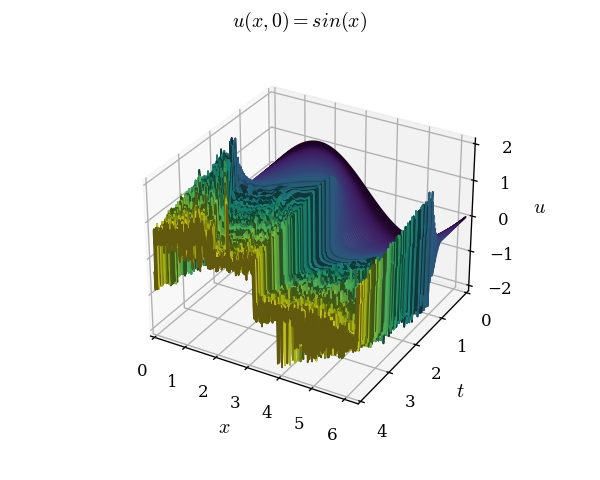

In [72]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = sin(x)$")
plt.show()

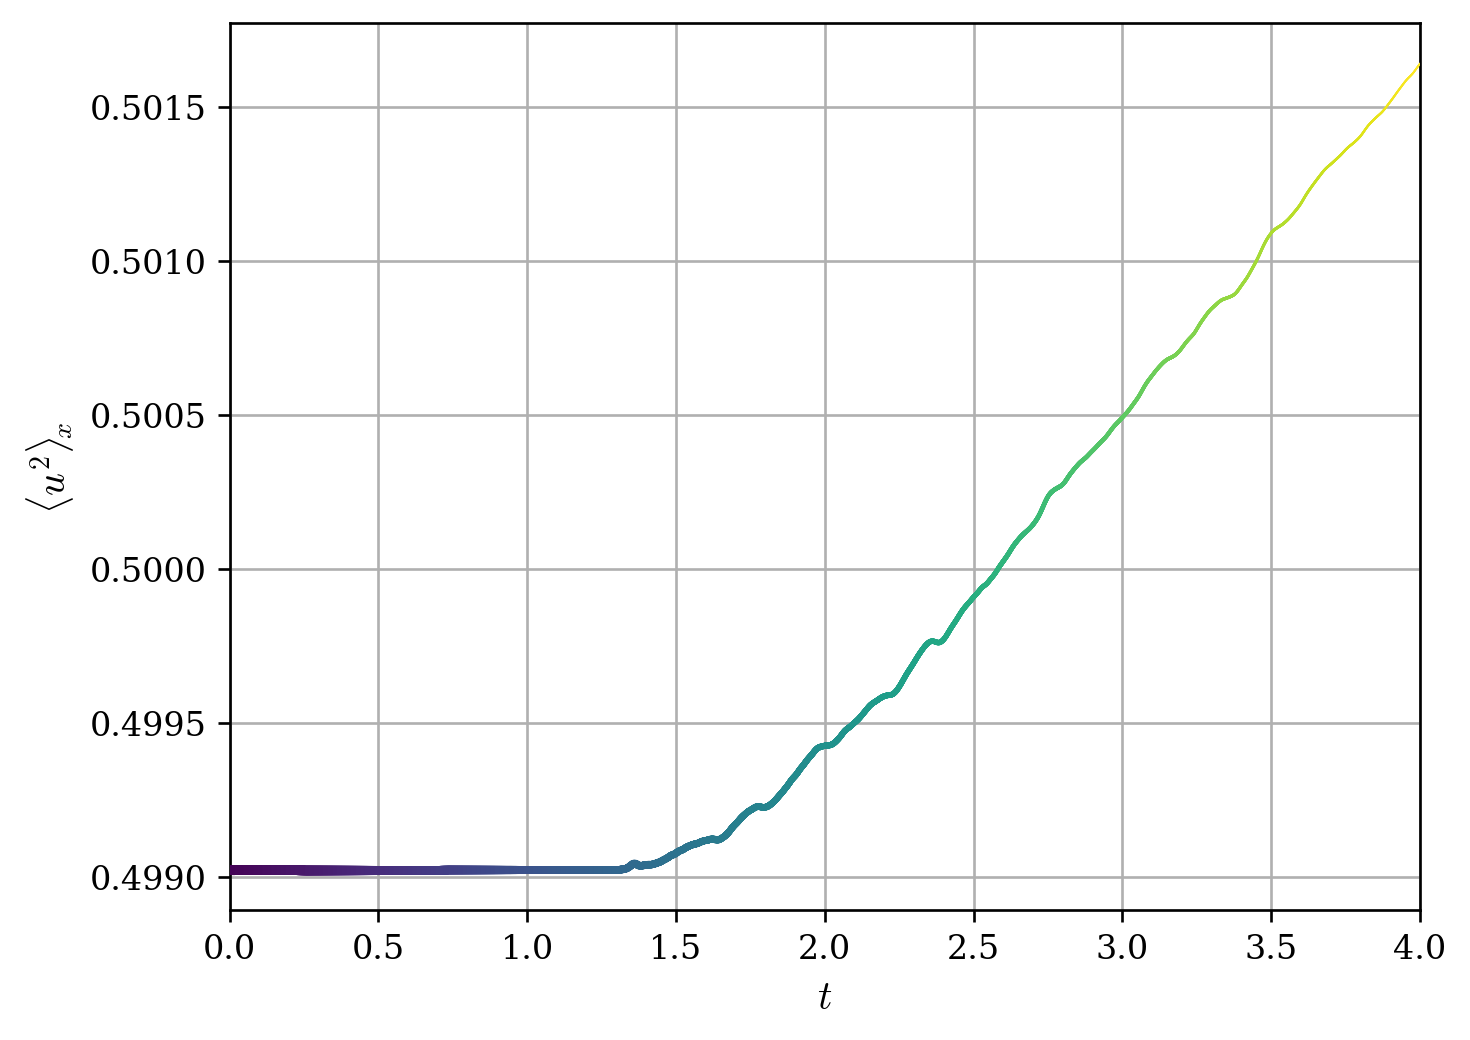

In [73]:
plt.close("all")
%matplotlib inline
ax, colormap = plot_colorline(t_vals, t_vals, np.mean(u**2, axis=0, ), cmap_name="viridis")
ax.grid()
ax.set_xlabel(r"$t$")
ax.set_xlim(t_vals.min(), t_vals.max())
ax.set_ylabel(r"$\langle u^2 \rangle\!_x$")
plt.show()

### b)

In [74]:
nu = 1e-2
u = [  # Lista de arrays con la velocidad
    np.sin(x_vals),  # CI: senoidal pura
    ]

# Aplico el método de Euler para la integración temporal
n = 0
while (u[-1].max() - u[-1].min()) > (u[0].max() - u[0].min()) / 2:
    u.append(evol(u[n], k_vals, nu, nx, dt))
    n += 1
u = np.array(u).T
t_vals = np.arange(0, (n + 0.5)*dt, dt)  # Tiempo

No such comm: b44011e46bd9471492309145b6e0379d


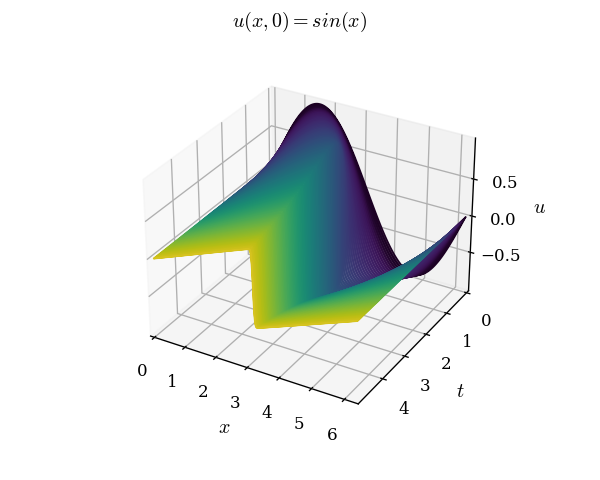

In [75]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = sin(x)$")
plt.show()

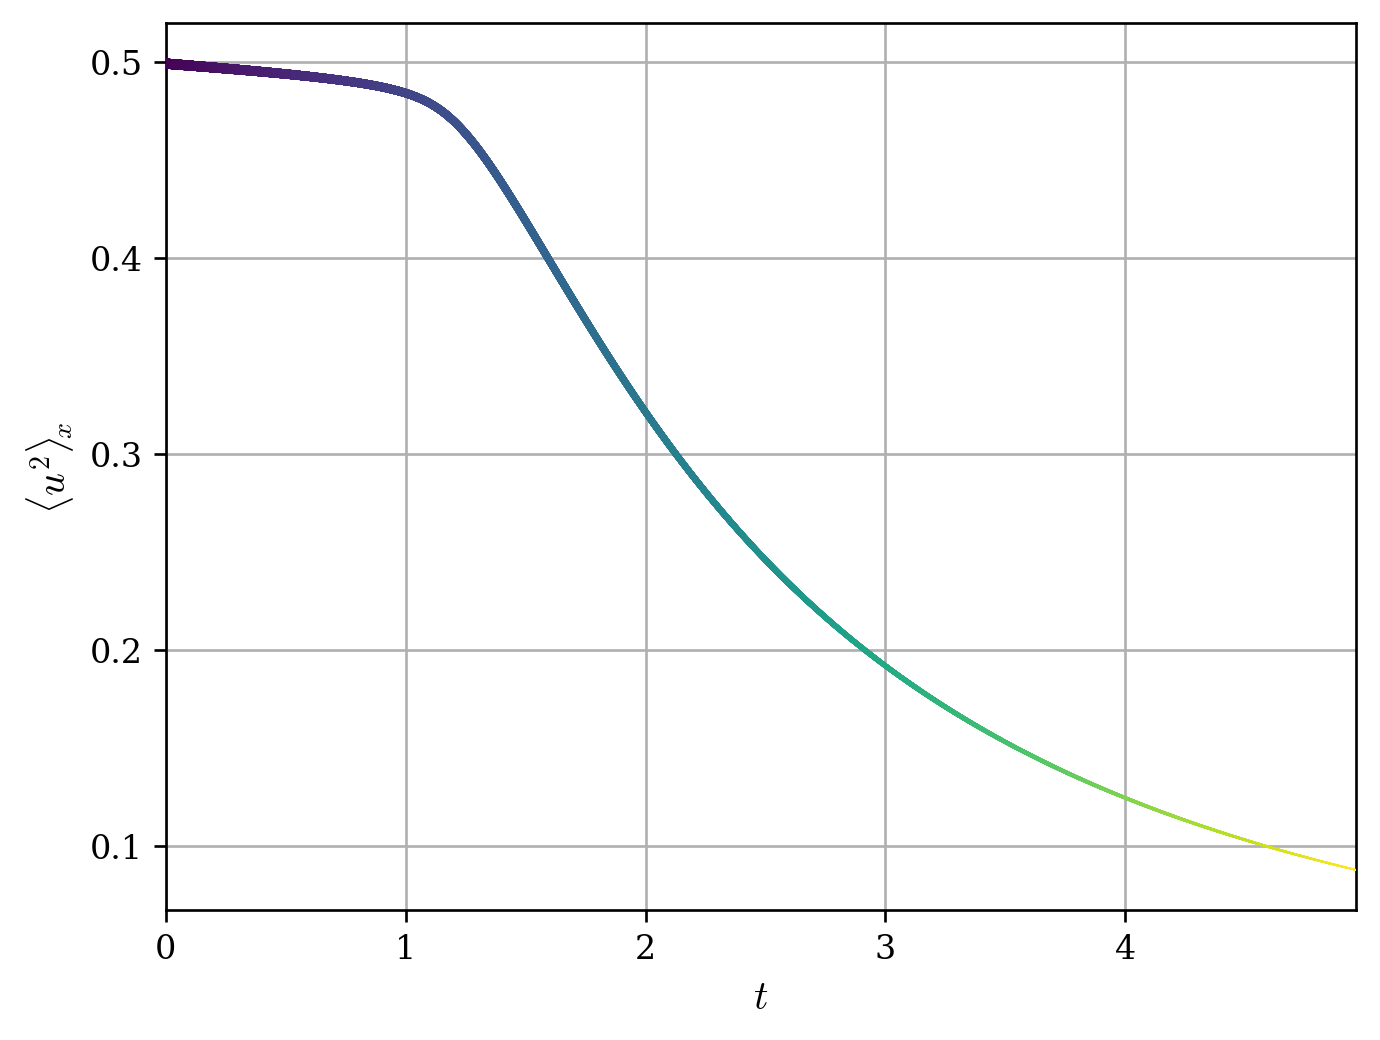

In [76]:
plt.close("all")
%matplotlib inline
ax, colormap = plot_colorline(t_vals, t_vals, np.mean(u**2, axis=0, ), cmap_name="viridis")
ax.grid()
ax.set_xlabel(r"$t$")
ax.set_xlim(t_vals.min(), t_vals.max())
ax.set_ylabel(r"$\langle u^2 \rangle\!_x$")
plt.show()

### c)

In [77]:
nu = 1e-1
u = [  # Lista de arrays con la velocidad
    np.sin(x_vals),  # CI: senoidal pura
    ]

# Aplico el método de Euler para la integración temporal
n = 0
while (((u[-1].max() - u[-1].min()) > (u[0].max() - u[0].min()) / 2)
    and n < 12):
    u.append(evol(u[n], k_vals, nu, nx, dt))
    n += 1
u = np.array(u).T
t_vals = np.arange(0, (n + 0.5)*dt, dt)  # Tiempo

No such comm: 57ad876a0ccc4e69a5d96b1cd1aa1c72


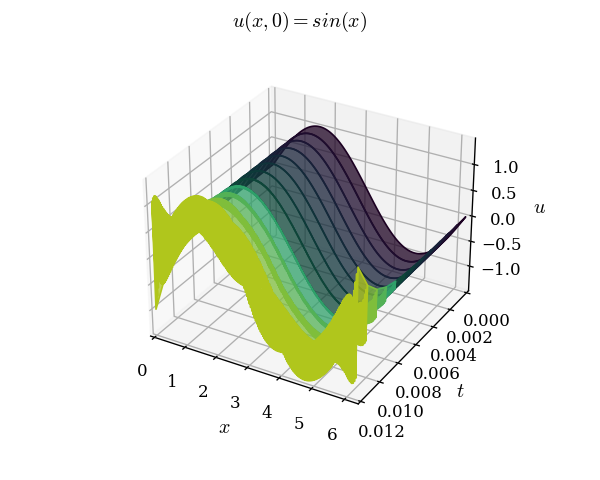

In [78]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = sin(x)$")
plt.show()

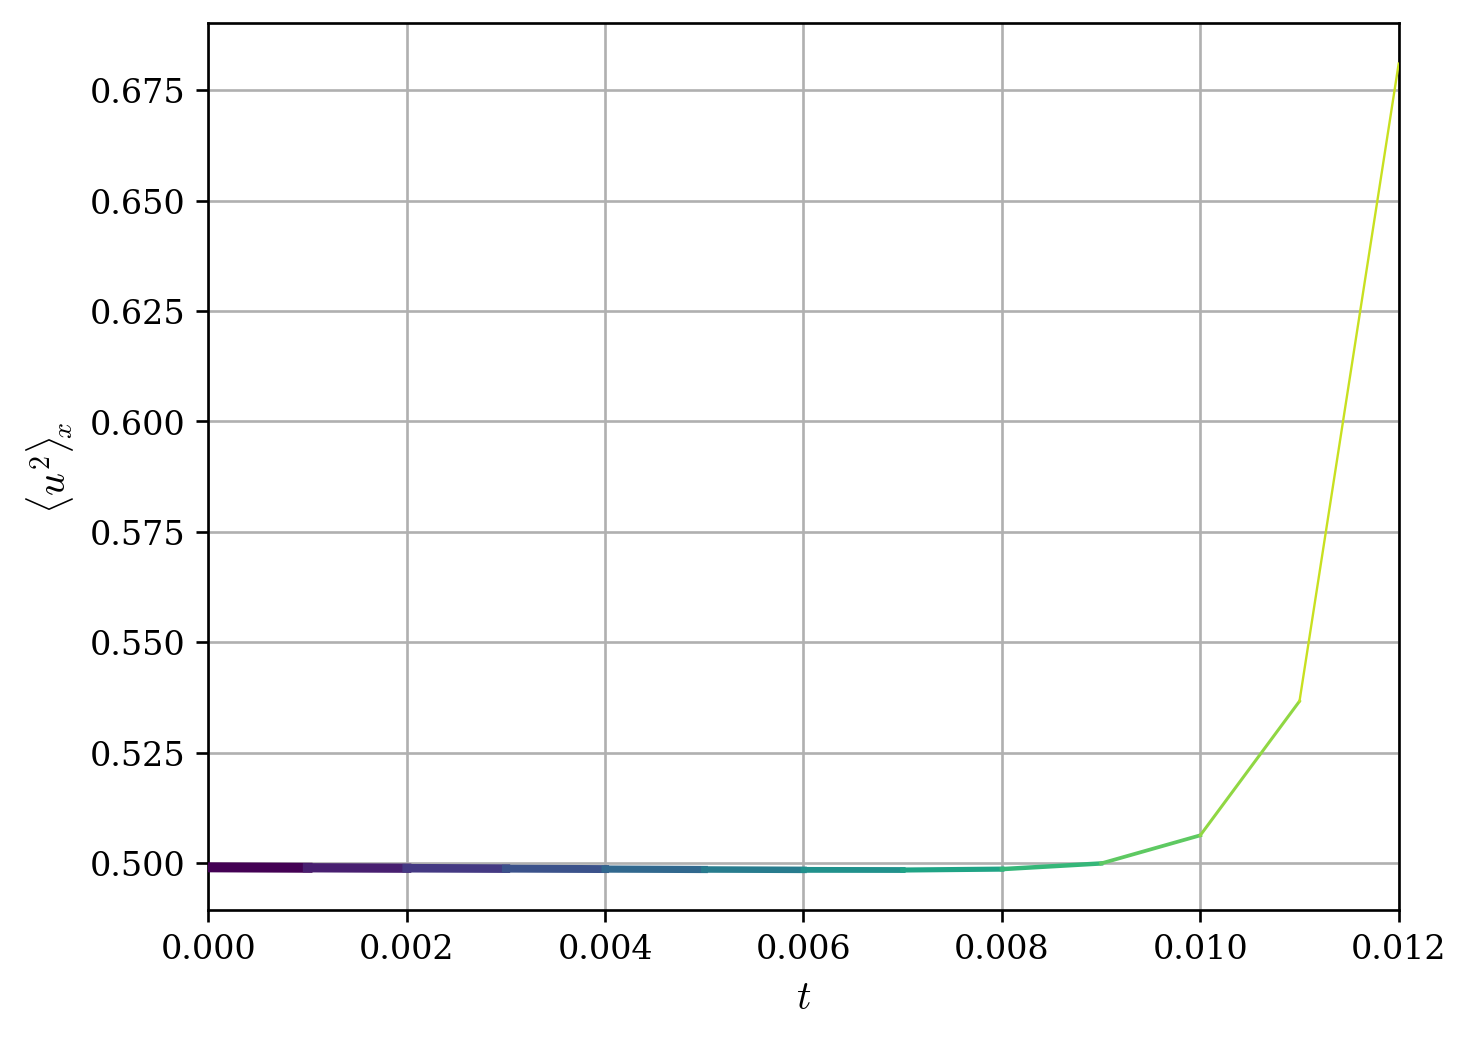

In [79]:
plt.close("all")
%matplotlib inline
ax, colormap = plot_colorline(t_vals, t_vals, np.mean(u**2, axis=0, ), cmap_name="viridis")
ax.grid()
ax.set_xlabel(r"$t$")
ax.set_xlim(t_vals.min(), t_vals.max())
ax.set_ylabel(r"$\langle u^2 \rangle\!_x$")
plt.show()

In [80]:
nu = 1e-3
u = [  # Lista de arrays con la velocidad
    np.sin(x_vals),  # CI: senoidal pura
    ]

# Aplico el método de Euler para la integración temporal
n = 0
while ((u[-1].max() - u[-1].min()) > (u[0].max() - u[0].min()) / 2):
    u.append(evol(u[n], k_vals, nu, nx, dt))
    n += 1
u = np.array(u).T
t_vals = np.arange(0, (n + 0.5)*dt, dt)  # Tiempo

No such comm: a19085a31c2e49529eed8232af76f80a


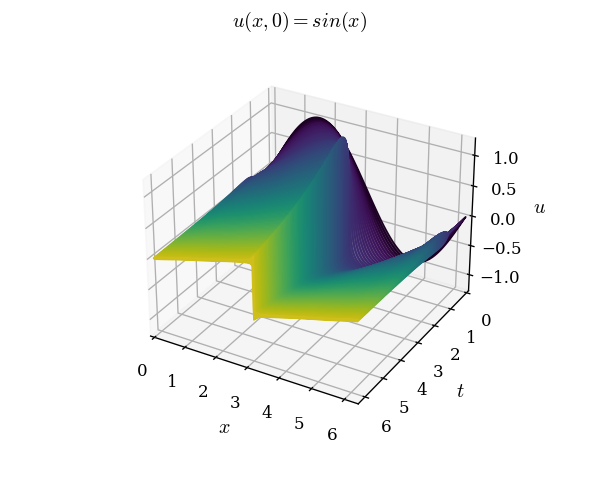

In [81]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = sin(x)$")
# ax.set_zlim(-1, 1)
plt.show()
%matplotlib inline

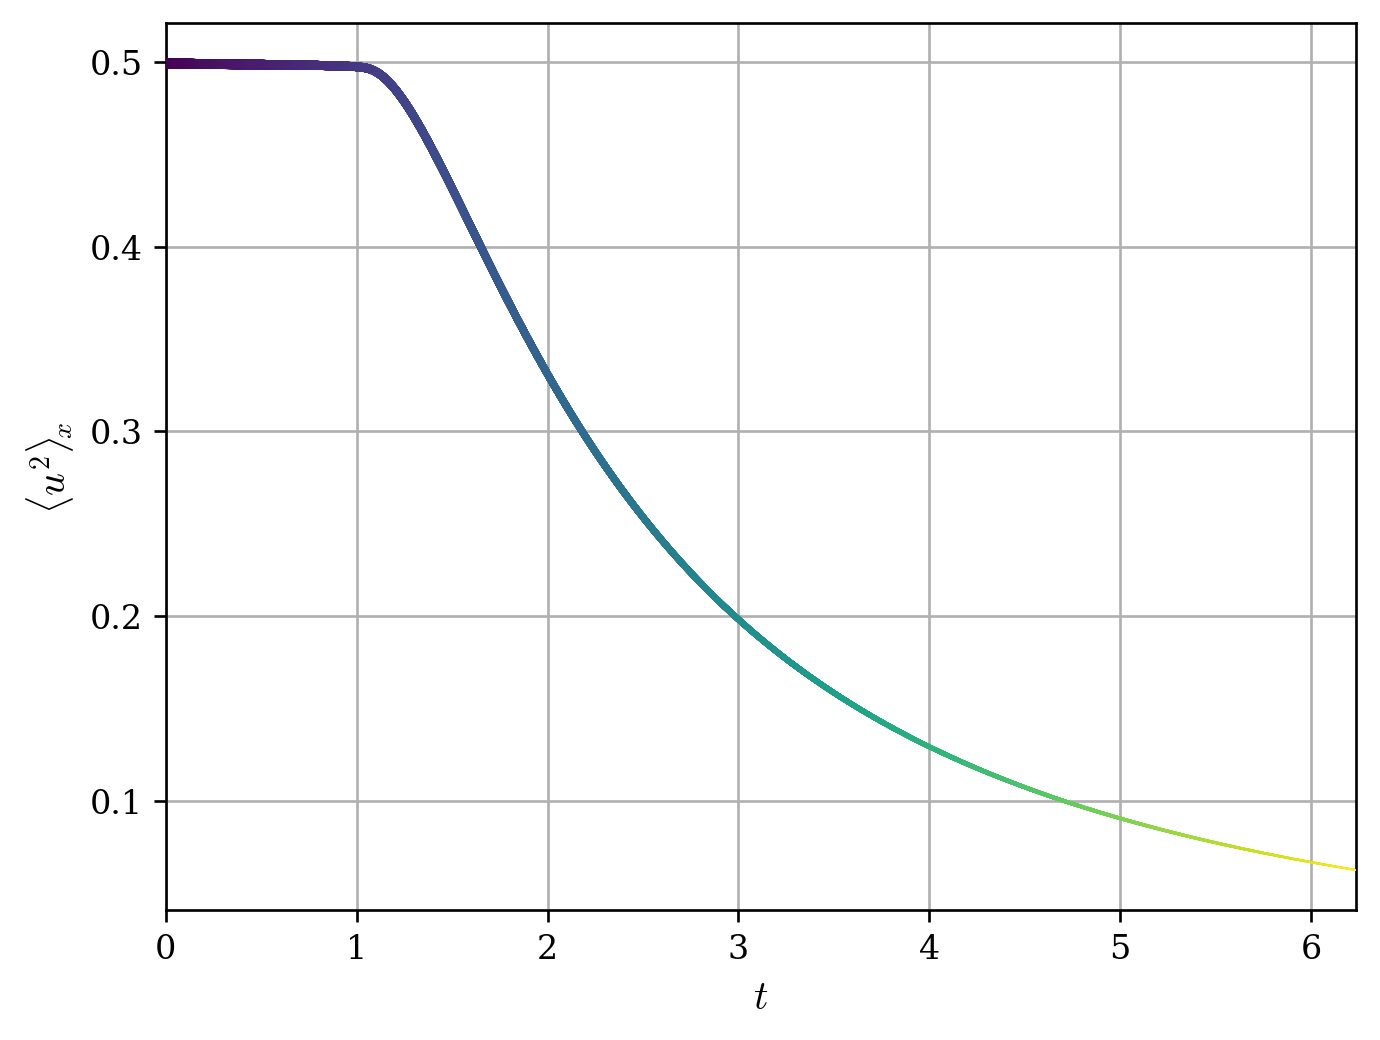

In [82]:
plt.close("all")
%matplotlib inline
ax, colormap = plot_colorline(t_vals, t_vals, np.mean(u**2, axis=0, ), cmap_name="viridis")
ax.grid()
ax.set_xlabel(r"$t$")
ax.set_xlim(t_vals.min(), t_vals.max())
ax.set_ylabel(r"$\langle u^2 \rangle\!_x$")
plt.show()

## **Ejercicio 4: Burgers con PINNS**

Integre la ecuación de Burgers usando PINNs. En este caso, vamos a utilizar las PINNs como un integrador a partir de las condiciones iniciales.

Para ello, vamos a partir de una condición inicial $u_0(x,0) = \sin ( x)$ con $x \in [0,2 \pi]$. Además, vamos a poner condiciones de contorno tal que $u(0,t) = u(2 \pi,t) = 0$. Estos van a ser los datos que tenemos medidos del problema.


a) Usando la condición inicial descrita y con $\nu = 0$ use una PINN para integrar para $t \in [0,1]$. Grafique la solución de la red para distintos tiempos. Grafique $u(x,t)$ completo en todos los puntos donde evalua la física como una imagen. Interprete lo que ve. ¿Qué diferencias encuentra con lo visto en otros ejercicios? ¿Se cumple la conservación para la integral primera? [importante: Seleccione los parámetros por su cuenta]

b) Repita el punto $a$ pero con $\nu = 1 \times 10^{-2}$. Grafique para distintos tiempos y la matriz de  $u(x,t)$. Compare con la solución obtenida con métodos pseudoespectrales. Describa las diferencias que encuentra.

~~Importamos las librerías correspondientes~~
(moví los imports a la primera celda del notebook)

In [117]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Definimos la clase MLP

In [118]:
class MLP(torch.nn.Module):
    """
    Multilayer perceptron (MLP) // Perceptríon Multicapa .

    Esta clase define una red neuronal feedforward con múltiples capas ocultas
    lineales, funciones de activación tangente hiperbólica en  las capas ocultas
    y una salida lineal.

    Args:
        sizes (lista): Lista de enteros que especifica el número de neuronas en
        cada capa. El primer elemento debe coincidir con la dimensión de entrada
        y el último con la dimensión de salida.

    Atributos:
        capas (torch.nn.ModuleList): Lista que contiene las capas lineales del MLP.

    Métodos:
        forward(x): Realiza una pasada hacia adelante a través de la red MLP.

    Ejemplo:
        tamaños = [entrada_dim, oculta1_dim, oculta2_dim, salida_dim]
        mlp = MLP(tamaños)
        tensor_entrada = torch.tensor([...])
        salida = mlp(tensor_entrada)
    """
    def __init__(self,sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        for i in range(len(sizes)-1):
            self.layers.append(torch.nn.Linear(sizes[i],sizes[i+1]))
    def forward(self,x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))
        output = self.layers[-1]
        y = output(h)
        return y

Definimos las condiciones iniciales y condiciones de contorno

In [119]:
grid_size = 100
# Condiciones Iniciales
t_data_init = torch.zeros(grid_size).view(-1, 1)  # defina grid_size puntos entre 0 y 1   No olvidar .view(-1,1)
x_data_init = torch.linspace(0, 2 * torch.pi, grid_size).view(-1, 1)  # defina grid_size puntos entre 0 y 2pi No olvidar .view(-1,1)
y_data_init = torch.sin(x_data_init).view(-1, 1)  # defina la condicion inicial     No olvidar .view(-1,1)
input_init = torch.cat((x_data_init, t_data_init), dim=1)  # Junta las condiciones iniciales para que tengan la forma correcta
# Condiciones de Contorno
t_data_cc = torch.cat((t_data_init, t_data_init), dim=0).view(-1,1)  # grid_size puntos temporales dos veces
x_data_cc = torch.cat((torch.zeros(grid_size), torch.full((grid_size, ), 2 * torch.pi)), dim = 0).view(-1,1)  # grid_size puntos en 0 y grid_size en 2π
y_data_cc = torch.zeros(2 * grid_size).view(-1,1)  # 2·grid_size puntos que valen 0
input_cc = torch.cat((x_data_cc, t_data_cc), dim=1) # Los juntamos para que pueda ser input la red

Definimos los puntos para evaluar la física. Estos deberán ser una grilla de 100x100 en el tiempo y el espacio.

In [120]:
t_physics = torch.linspace(0, 1, grid_size)  # grid_size puntos de 0 a 1
x_physics = torch.linspace(0, 2 * torch.pi, grid_size)  # grid_size puntos de 0 a 2 pi
x_grid, t_grid = torch.meshgrid(x_physics, t_physics, indexing='ij')
x_grid = x_grid[:, :, None].requires_grad_(True)  # Agregamos una dimensión al final para que pueda ser input de la red
t_grid = t_grid[:, :, None].requires_grad_(True)  # Agregamos una dimensión al final para que pueda ser input de la red
input_physics = torch.cat((x_grid, t_grid), dim=-1)

Defina la red y el optimizador. Se recomienda para empezar a explorar una red con $8$ capas ocultas con $20$ neuronas cada una. Use el peso relativo entre la física y lo demás como 1.

In [121]:
# Definición de la red y optimizador
pinn = MLP(
    sizes=[2, ] + [20, ] * 8 + [1, ],
)
optimizer = torch.optim.Adam(pinn.parameters(), lr=1e-4)  # Repito de Guía 1

Complete con lo que sea necesario el loop de entrenamiento

In [125]:
iterations = 10_000 # Numero de iteraciones
lam = 1  # Peso relativo lambda
nu = 0  # Viscosidad de la ecuación de Burgers

loss_vals = np.empty((iterations, 3))
for epoch in range(iterations):
    optimizer.zero_grad()
    # Condiciones Iniciales
    yh_init = pinn(input_init)  # Evalue las condiciones iniciales en la red
    loss1 = torch.mean((yh_init - y_data_init)**2)  # Defina este error como el MSE de la condición inicial
    # Condiciones de Contorno
    yh_cc = pinn(input_cc)  # Evalue las condiciones de contorno en la red
    loss2 = torch.mean((yh_cc - y_data_cc)**2)  # Defina este error como el MSE de las condiciones de contorno
    # Condiciones de la Física
    yhp = pinn(input_physics)  # Evalue las colocaciones de la física en la red
    yhp_dx = torch.autograd.grad(yhp, x_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_x
    if nu != 0:
        yhp_dx2 = torch.autograd.grad(yhp_dx, x_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_xx
    else:
        yhp_dx2 = 0
    yhp_dt = torch.autograd.grad(yhp, t_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_t
    physics = yhp_dt + yhp*yhp_dx - nu*yhp_dx2  # Complete con la ecuación diferencial
    loss3 = lam*torch.mean(physics**2)  # Defina este error como el MSE de la ecuación diferencial en las colocaciones pesado por λ
    loss = loss1 + loss2 + loss3  # Sumamos todos los errores
    loss.backward()
    optimizer.step()
    with torch.autograd.no_grad():
    	# print(epoch,'CI',float(loss1), 'CC', float(loss2), 'Física:',float(loss3),"Traning Loss:",float(loss.data))
        print(
            f"{epoch: 5} CI MSE: {loss1: 5.4g}\tCC MSE: {loss2: 5.4g}\tPhys MSE: {loss3: 5.4g}\t",
            f"Traning Loss: {loss.data: 5.4g}",
            sep="", end="\r"
        ) #Imprimimos el error
        loss_vals[epoch] = [loss1, loss2, loss3]

KeyboardInterrupt: 

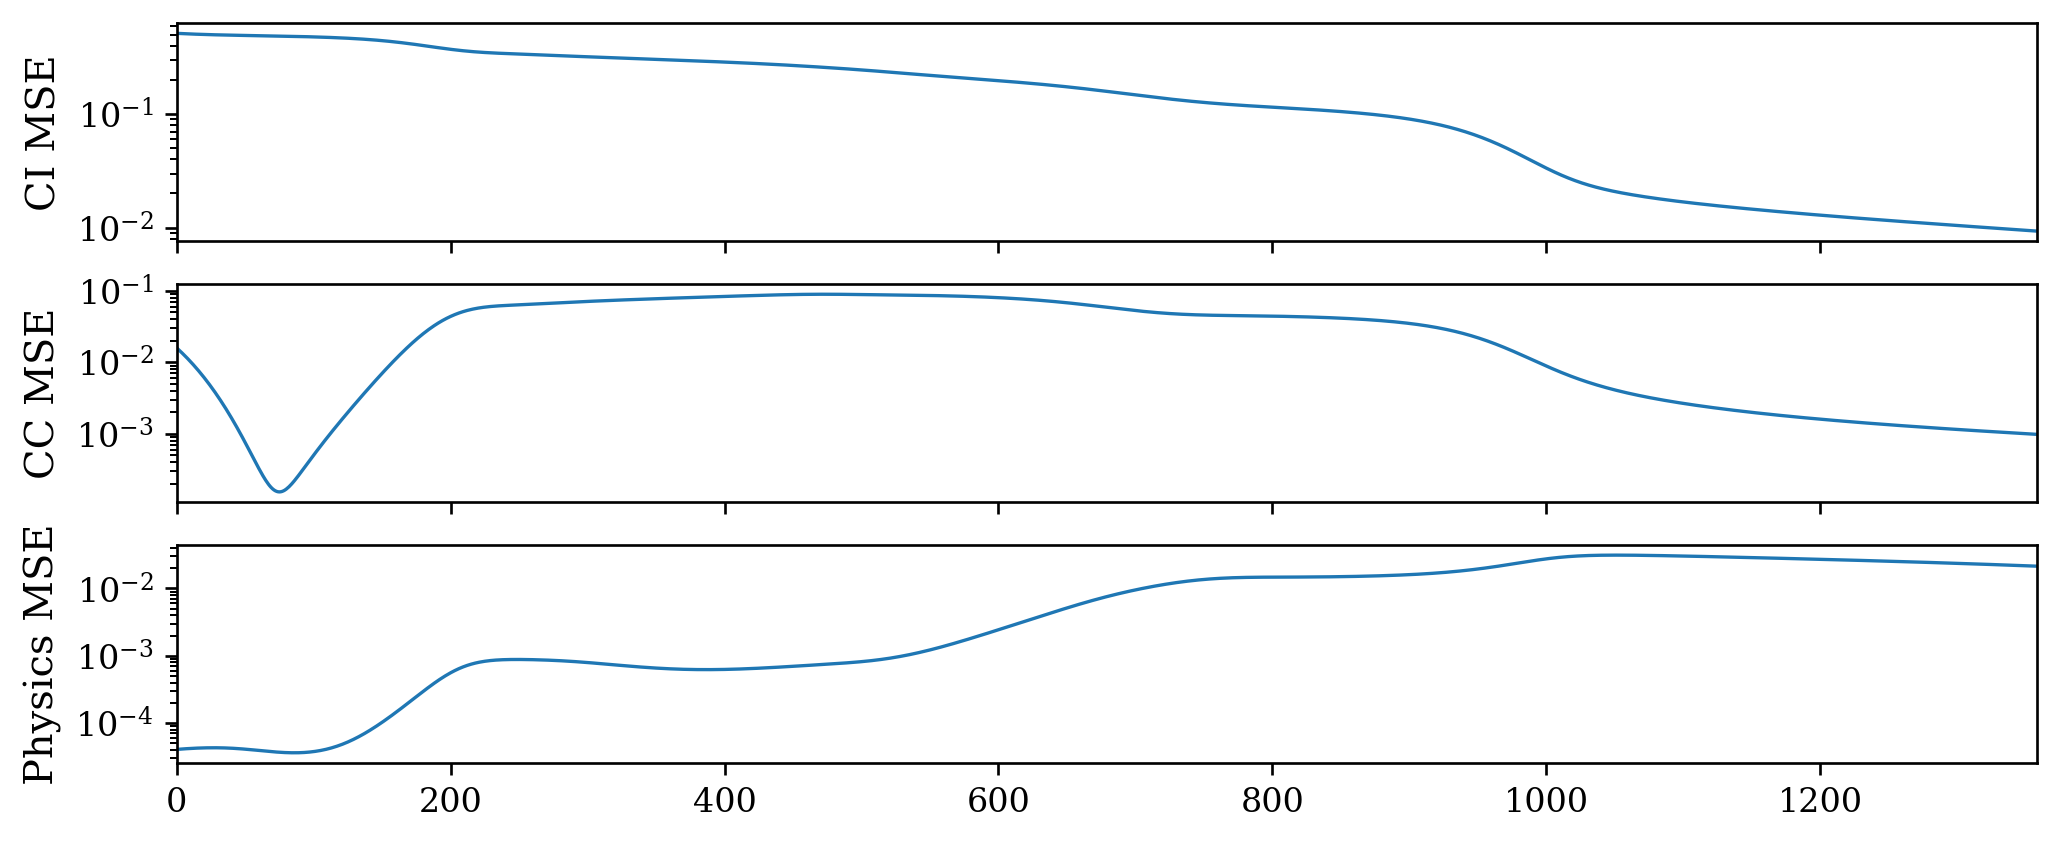

In [127]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 4))
axs[0].set_ylabel("CI MSE")
axs[1].set_ylabel("CC MSE")
axs[2].set_ylabel("Physics MSE")
plot_every = 1
epoch_vals = np.arange(0, epoch, plot_every)
for loss_idx, ax in enumerate(axs):
    ax.plot(
        epoch_vals,
        loss_vals[:epoch:plot_every, loss_idx],
        "-", lw=1,
    )
    # ax.set_ylim(0, np.median(loss_vals[::plot_every, loss_idx]))
    # ax.set_ylim(-1e-5, 1e-5)
    ax.set_yscale("log")
    ax.set_xlim(0, epoch)
plt.show()

In [128]:
plot_size = 100
t_plot = torch.linspace(0, 1, plot_size).view(-1, 1)  # Definimos muestra temporal para graficar
x_plot = torch.linspace(0, 2 * torch.pi, plot_size).view(-1, 1)  # Definimos muestra espacial para graficar
xx_plot, tt_plot = torch.meshgrid(t_physics, x_physics, indexing='ij')
xx_plot = x_grid[:, :, None]  # Agregamos una dimensión al final para que pueda ser input de la red
tt_plot = t_grid[:, :, None]  # Agregamos una dimensión al final para que pueda ser input de la red
input_plot = torch.cat((xx_plot, tt_plot), dim=-1)
y_plot = pinn(input_plot)  # Evaluamos la red en la grilla

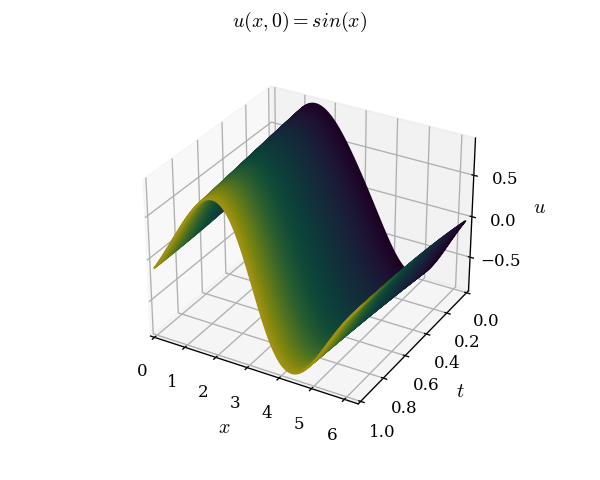

In [129]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(
    x_plot.detach().numpy(),
    t_plot.detach().numpy(),
    y_plot.detach().numpy().reshape((plot_size, plot_size)),
    cmap_name="viridis",
)
fig.set_label("Evolución de la Ecuación de Burgers mediante PINN")
fig.suptitle(r"$u(x, 0) = sin(x)$")
# ax.set_zlim(-1, 1)
plt.show()
%matplotlib inline

In [130]:
plt.close("all")

In [92]:
iterations = 15_000 # Numero de iteraciones
lam = 1  # Peso relativo lambda
nu = 1e-2  # Viscosidad de la ecuación de Burgers

loss_vals = np.empty((iterations, 3))
for epoch in range(iterations):
    optimizer.zero_grad()
    # Condiciones Iniciales
    yh_init = pinn(input_init)  # Evalue las condiciones iniciales en la red
    loss1 = torch.mean((yh_init - y_data_init)**2)  # Defina este error como el MSE de la condición inicial
    # Condiciones de Contorno
    yh_cc = pinn(input_cc)  # Evalue las condiciones de contorno en la red
    loss2 = torch.mean((yh_cc - y_data_cc)**2)  # Defina este error como el MSE de las condiciones de contorno
    # Condiciones de la Física
    yhp = pinn(input_physics)  # Evalue las colocaciones de la física en la red
    yhp_dx = torch.autograd.grad(yhp, x_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_x
    if nu != 0:
        yhp_dx2 = torch.autograd.grad(yhp_dx, x_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_xx
    else:
        yhp_dx2 = 0
    yhp_dt = torch.autograd.grad(yhp, t_grid, torch.ones_like(yhp), create_graph=True)[0]  # computamos u_t
    physics = yhp_dt + yhp*yhp_dx - nu*yhp_dx2  # Complete con la ecuación diferencial
    loss3 = lam*torch.mean(physics**2)  # Defina este error como el MSE de la ecuación diferencial en las colocaciones pesado por λ
    loss = loss1 + loss2 + loss3  # Sumamos todos los errores
    loss.backward()
    optimizer.step()
    with torch.autograd.no_grad():
    	# print(epoch,'CI',float(loss1), 'CC', float(loss2), 'Física:',float(loss3),"Traning Loss:",float(loss.data))
        print(
            f"{epoch: 5} CI MSE: {loss1: 5.4g}\tCC MSE: {loss2: 5.4g}\tPhys MSE: {loss3: 5.4g}\t",
            f"Traning Loss: {loss.data: 5.4g}",
            sep="", end="\r"
        ) #Imprimimos el error
        loss_vals[epoch] = [loss1, loss2, loss3]

KeyboardInterrupt: 

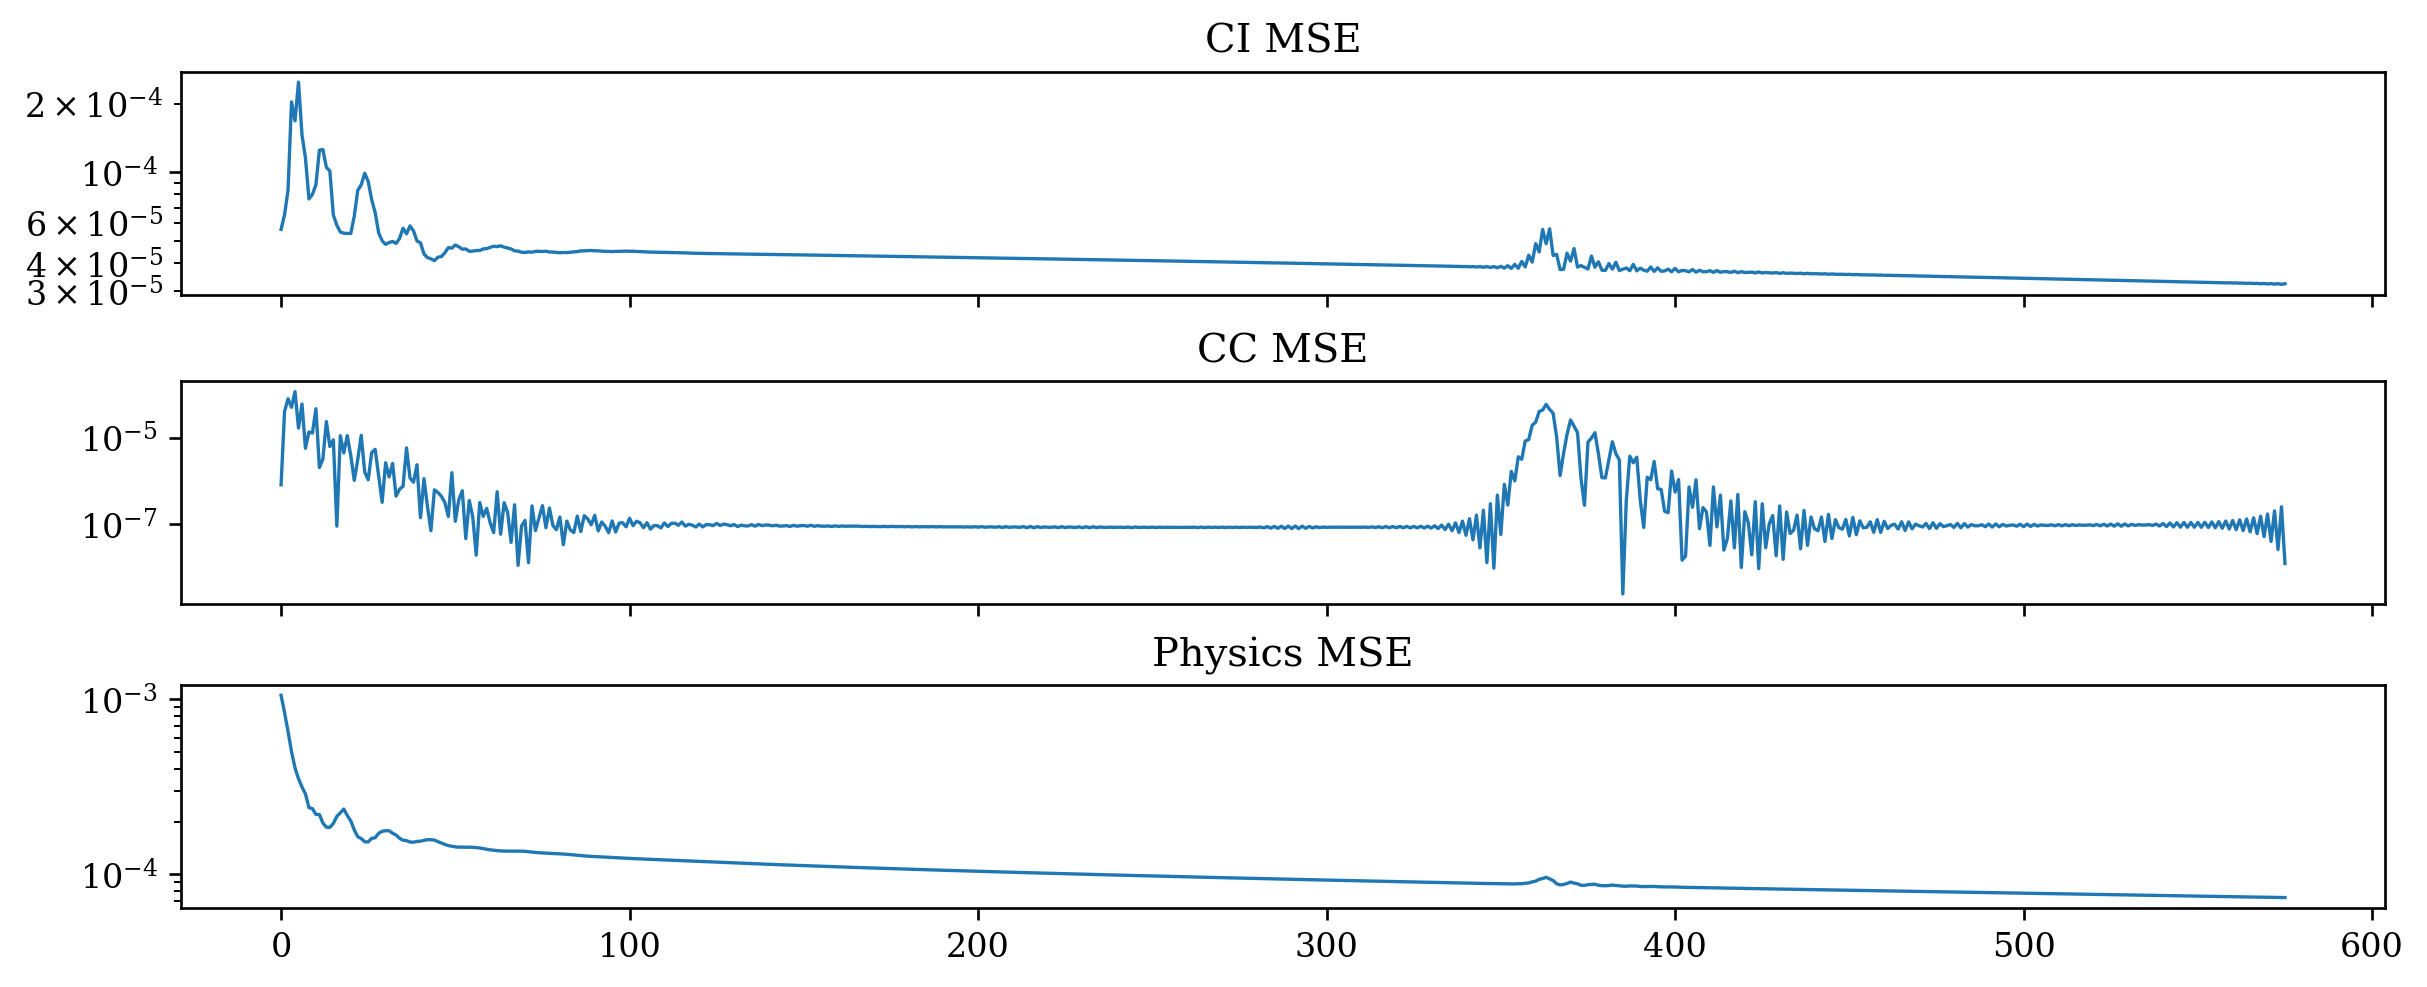

In [115]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 4), constrained_layout=True)
axs[0].set_title("CI MSE")
axs[1].set_title("CC MSE")
axs[2].set_title("Physics MSE")
plot_every = 1
epoch_vals = np.arange(0, epoch, plot_every)
for loss_idx, ax in enumerate(axs):
    ax.plot(
        epoch_vals,
        loss_vals[:epoch:plot_every, loss_idx],
        "-", lw=1,
    )
    # ax.set_ylim(0, np.median(loss_vals[::plot_every, loss_idx]))
    # ax.set_ylim(-1e-5, 1e-5)
    ax.set_yscale("log")
plt.show()

In [110]:
plot_size = 50
t_plot = torch.linspace(0, 1, plot_size)  # Definimos muestra temporal para graficar
x_plot = torch.linspace(0, 2 * np.pi, plot_size)  # Definimos muestra espacial para graficar
xx_plot, tt_plot = np.meshgrid(x_plot, t_plot, indexing='ij')
xx_plot = xx_plot[:, :, None]  # Agregamos una dimensión al final para que pueda ser input de la red
tt_plot = tt_plot[:, :, None]  # Agregamos una dimensión al final para que pueda ser input de la red
input_plot = np.concatenate([xx_plot, tt_plot], axis=-1)
y_plot = pinn(torch.tensor(input_plot))  # Evaluamos la red en la grilla

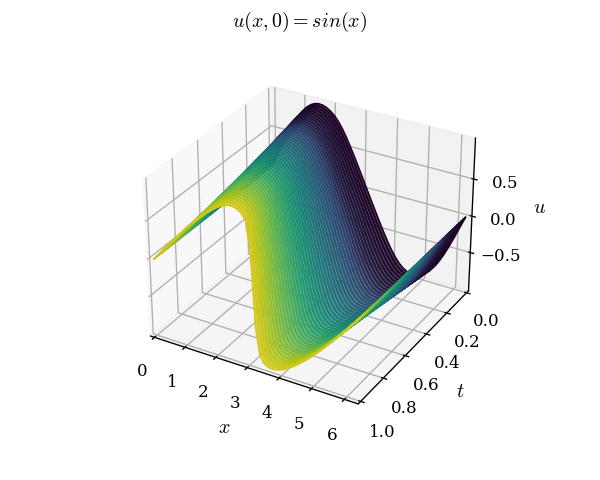

In [116]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(
    x_plot,
    t_plot,
    y_plot.detach().numpy().reshape((plot_size, plot_size)),
    cmap_name="viridis",
)
fig.set_label("Evolución de la Ecuación de Burgers mediante PINN")
fig.suptitle(r"$u(x, 0) = sin(x)$")
# ax.set_zlim(-1, 1)
plt.show()
%matplotlib inline

In [113]:
plt.close("all")

## **Ejercicio 5: Ecuación de Kardar-Parisi-Zhang** (Burgers potencial)

La ecuación de Burgers en forma potencial puede hallarse considerando $\overline{u} = \overline{\nabla}\phi$:

\begin{equation*}
    \frac{\partial \phi}{\partial t} + \frac{1}{2}(\overline{\nabla}\phi)^2 - \nu \nabla^2 \phi.
\end{equation*}

A partir de esto, el modelo de Kardar-Parisi-Zhang (KPZ) se obtiene mediante un cambio de variables simple para $\phi(x,t)$ y agregando difusión y ruido al azar:

\begin{equation*}
    \frac{\partial h}{\partial t} + \frac{\lambda^2}{2}(\overline{\nabla}h)^2 - \nu \nabla^2 h + \eta,
\end{equation*}

donde $\eta$ representa un ruido Gaussiano.

Dada la versión lineal de KPZ (Burgers potencial) con forzado aleatorio

\begin{equation*}
    \frac{\partial \phi}{\partial t} +  \frac{1}{2}(\frac{\partial \phi}{\partial x})^2-\nu \frac{\partial^2 \phi}{\partial x^2}+\eta
\end{equation*}

donde $\eta(x,t)$ es ruido aleatorio con valor medio nulo, se pide:

$\bf a).$ Integrá la ecuación con condiciones de contorno periódicas entre $x \in [0,2\pi)$, partiendo de una velocidad inicial nula y un ruido aleatorio con valor medio nulo. Como integrador temporal puede usarse Runge Kutta de orden 2.


$\bf b).$ Graficá la evolución en $(x,t)$, la evolcuión  para distintos t ($u(x,t)$ vs $t$) y zoom sucesivos para el ultimo tiempo. Describí cualitativamente la dinámica.

$\bf c)$ Cómo recupero Burgers? Graficá al menos una solución (alcanza con una condición inicial y una evolución de la misma para un tiempo) que sea como las que obtuviste en los ejercicios anteriores. Explicá (o escribí explicitamente en tu implementacion numérica) de que forma obtuviste esta solución.







## **Bloques para la integración temporal**

Pueden completar el siguiente bloque para la integración temporal.
Tengan en cuenta que pueden reciclar bastante del ejercicio anterior

In [ ]:
def evol(u,k,nu,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f   = np.fft.rfft(u)
    ft  = f
    eta = compute_random(N) # Calculamos el ruido para cada iteración completa de Runge-Kutta
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord
        fx  = 1j*k*f        # Derivada espacial de u en el espacio Fourier
        fnl = compute_vv(fx,N)
        f   =               #integrador temporal
        f[int(N/3):] = 0    # Dealiasing
    out = np.fft.irfft(f)
    return out

def compute_vv(f,N):
    # Calcula v^2 usando el método pseudoespectral y devuelve el resultado en el espacio Fourier

    return out

def compute_random(N):
    # Genera ruido Gaussiano con media nula y varianza unitaria en el espacio Fourier
    phase  = 2*np.pi*np.random.rand(int(N/2+1))
    ampl   = np.random.randn(int(N/2+1))
    out    =
    out[0] = 0.
    return out